In [1]:
#importation des bibilotheques necessaires
import matplotlib.pyplot as plt
import numpy as np
import skimage 
import skimage.filters
from skimage import data


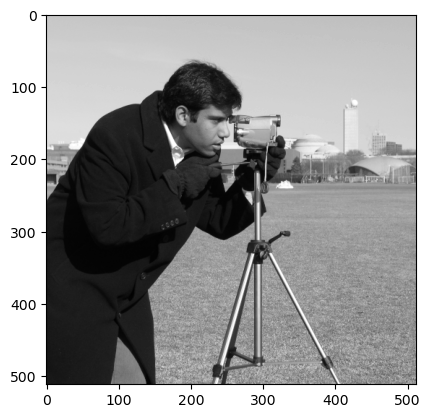

In [2]:
camera=skimage.data.camera()
plt.imshow(camera,'gray')
plt.show()

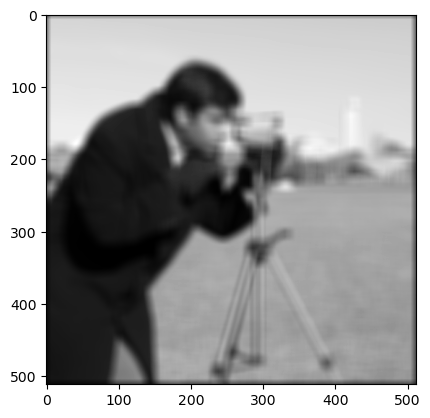

In [3]:
from scipy.signal import convolve2d

taille =15
h =np.ones((taille,taille))/taille**2
I_moy = convolve2d(camera,h,mode='same')
plt.imshow(I_moy,'gray')
plt.show()

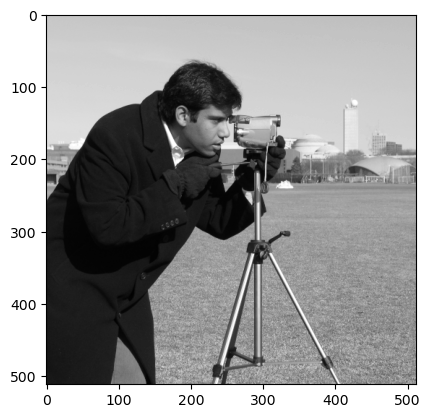

In [4]:
plt.imshow(camera,'gray')
plt.show()

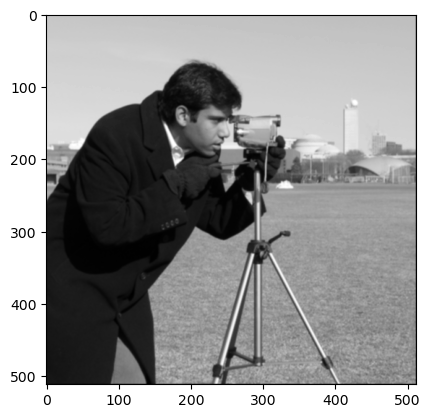

In [5]:
h=1/6 * np.array([[1,2,1],[2,4,2],[1,2,1]])
I_gauss = convolve2d(camera, h, mode='same')
plt.imshow(I_gauss,'gray')
plt.show()

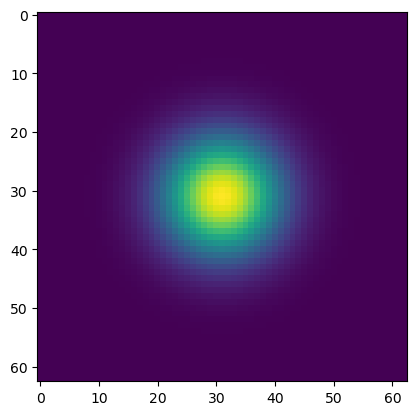

In [6]:
#On va calculer en utilisant la fonction h[i,j]
k=31
sigma=7
x=np.arange(-k,k+1)
[i,j]=np.meshgrid(x,x)
h=1/(2*np.pi*sigma**2)*np.exp(-(i**2+j**2)/(2*sigma**2))
h=h/np.sum(h)
plt.imshow(h)
plt.show()



In [7]:
print(h.shape)

(63, 63)


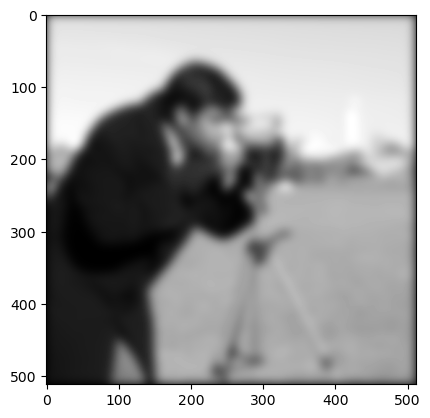

In [8]:
I_gauss=convolve2d(camera,h,mode='same')
plt.imshow(I_gauss,'gray')
plt.show()

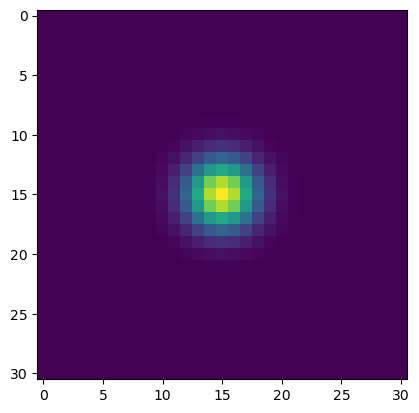

In [9]:
#Tester autres valeurs our k et sigma 
k=15
sigma=2
x=np.arange(-k,k+1)
[i,j]=np.meshgrid(x,x)
h2=1/(2*np.pi*sigma**2)*np.exp(-(i**2+j**2)/(2*sigma**2))
h2=h2/np.sum(h2)
plt.imshow(h2)
plt.show()

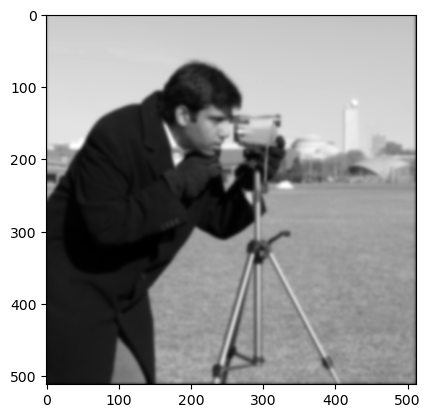

In [10]:
I_gauss=convolve2d(camera,h2,mode='same')
plt.imshow(I_gauss,'gray')
plt.show()

NOTEBOOK 2 :

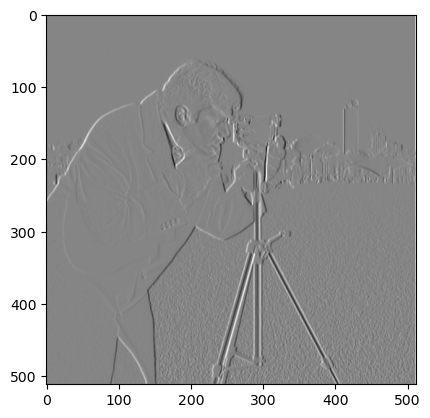

In [11]:
#Filtre Gradient , composante horizontale
hx= np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
Ix = convolve2d(camera, hx, mode='same')
plt.imshow(Ix,'gray')
plt.show()

In [12]:
#Affichage de la matrice utilisée:
print(hx)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


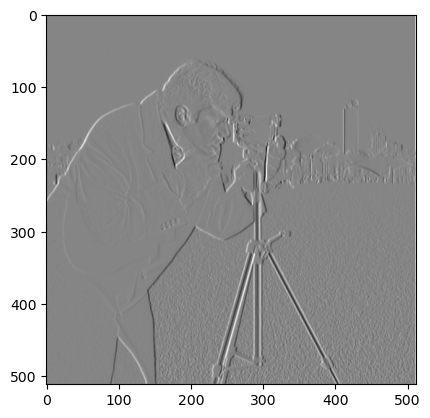

In [13]:
#Composante verticale 
hy=hx.transpose()
Iy = convolve2d(camera, hx, mode='same')
plt.imshow(Iy,'gray')
plt.show()

In [14]:
print(hy)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


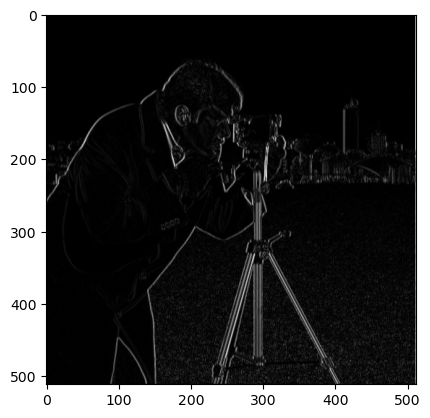

In [15]:
#Norme de gradient
gradient = np.sqrt(Ix**2 + Iy**2)
plt.imshow(gradient,'gray')
plt.show()

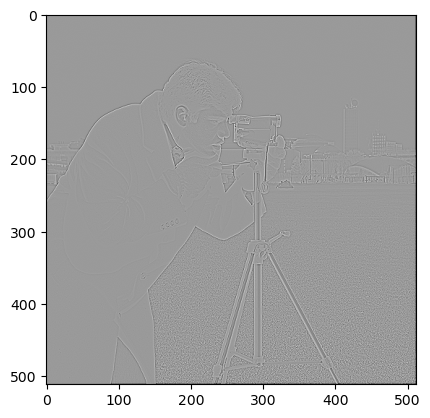

In [16]:
#Filtre Laplacien
hlap = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacien= convolve2d(camera,hlap,mode='same')
plt.imshow(laplacien,'gray')
plt.show()

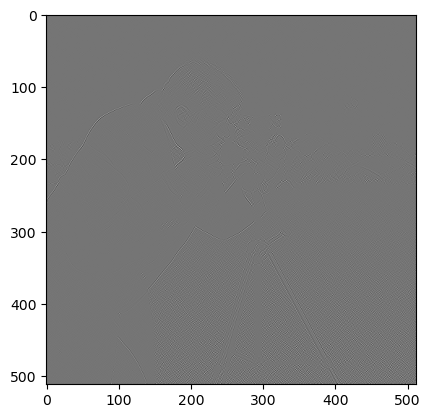

In [17]:
hlap = np.array([[1,-2,1],[-2,4,-2],[1,-2,1]])
laplacien= convolve2d(camera,hlap,mode='same')
plt.imshow(laplacien,'gray')
plt.show()

NOTEBOOK 3 :

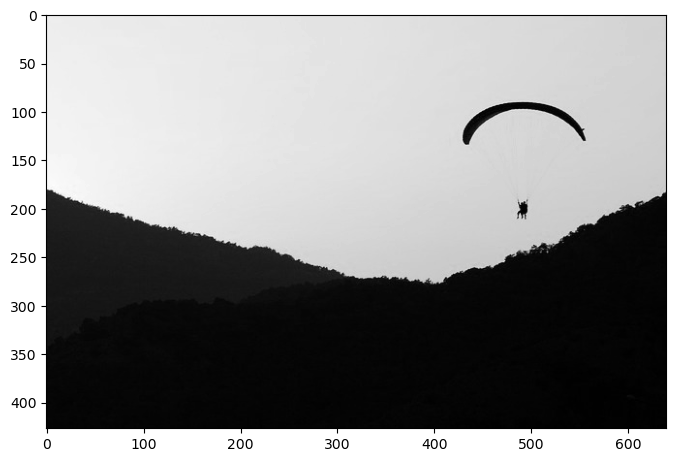

In [18]:
import skimage as ski 
import skimage.io as io
import skimage.util as util
import matplotlib.pyplot as plt
import numpy as np
from skimage import color 

parapente= io.imread('./parapente.jpg')
parapente_g=color.rgb2gray(parapente)
x=ski.img_as_float(parapente_g)
plt.figure(figsize=(8,8))
plt.imshow(parapente_g,'gray')
plt.show()


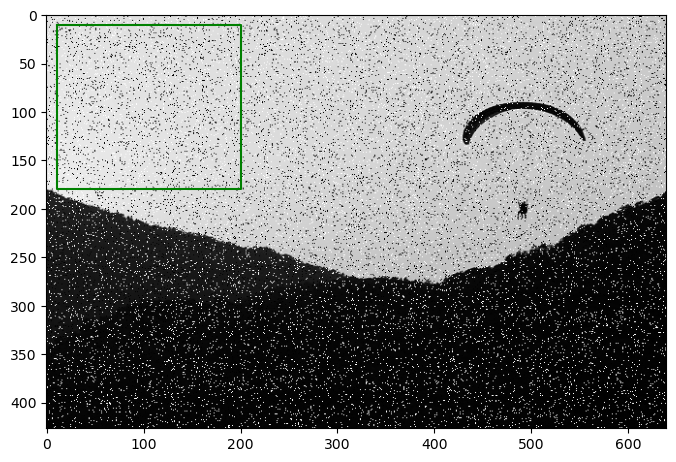

In [19]:
J = util.random_noise(parapente_g,mode='s&p', amount=0.1)
x1=10
y1=10
x2=200
y2=180
K = J[y1:y2,x1:x2]
plt.figure(figsize=(8,8))
plt.imshow(J,'gray')
plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],'g')
plt.show()


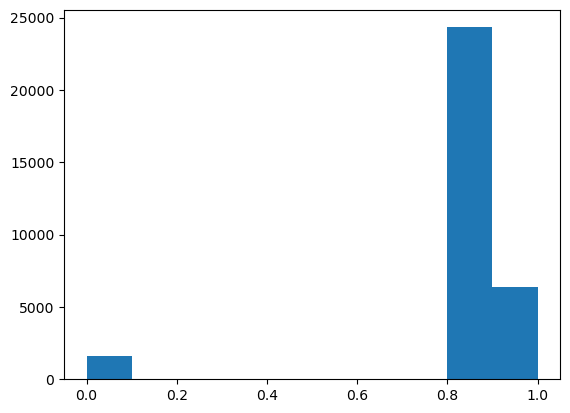

In [20]:
#Affichage de l 'histogramme de la matrice defaillante K
h , bins , patches = plt.hist(K.ravel())
plt.show()

In [21]:
M, N = K.shape
N0=np.sum(K==0)
N1=np.sum(K==1)
prop =(N0+N1)/(M+N)
print("Nombre de pixels : %d - Nombre de pixels à 0 : %d - Nombre de pixels à 1 : %d "%(M+N,N0,N1))
print("Proportion de pixels déffaillants : %.3f" %(prop))



Nombre de pixels : 360 - Nombre de pixels à 0 : 1605 - Nombre de pixels à 1 : 1581 
Proportion de pixels déffaillants : 8.850
